# NBA

## Importing Libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from pyspark import SparkContext
sc= SparkContext()

from pyspark.sql import SQLContext
sql= SQLContext(sc)

/usr/local/spark/python/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


## Loading dataset

In [2]:
file_path = "nba_dataset.csv"

In [3]:
myData = sql.read.csv(file_path, header = True)

In [4]:
myData.printSchema()

root
 |-- date: string (nullable = true)
 |-- season: string (nullable = true)
 |-- neutral: string (nullable = true)
 |-- playoff: string (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- elo1_pre: string (nullable = true)
 |-- elo2_pre: string (nullable = true)
 |-- elo_prob1: string (nullable = true)
 |-- elo_prob2: string (nullable = true)
 |-- elo1_post: string (nullable = true)
 |-- elo2_post: string (nullable = true)
 |-- carm-elo1_pre: string (nullable = true)
 |-- carm-elo2_pre: string (nullable = true)
 |-- carm-elo_prob1: string (nullable = true)
 |-- carm-elo_prob2: string (nullable = true)
 |-- carm-elo1_post: string (nullable = true)
 |-- carm-elo2_post: string (nullable = true)
 |-- raptor1_pre: string (nullable = true)
 |-- raptor2_pre: string (nullable = true)
 |-- raptor_prob1: string (nullable = true)
 |-- raptor_prob2: string (nullable = true)
 |-- score1: string (nullable = true)
 |-- score2: string (nullable = true)
 

In [5]:
myData.show()

+----------+------+-------+-------+-----+-----+----------------+----------------+------------------+-------------------+----------------+----------------+-------------+-------------+--------------+--------------+--------------+--------------+----------------+----------------+-----------------+------------------+------+------+-------+----------+------------+
|      date|season|neutral|playoff|team1|team2|        elo1_pre|        elo2_pre|         elo_prob1|          elo_prob2|       elo1_post|       elo2_post|carm-elo1_pre|carm-elo2_pre|carm-elo_prob1|carm-elo_prob2|carm-elo1_post|carm-elo2_post|     raptor1_pre|     raptor2_pre|     raptor_prob1|      raptor_prob2|score1|score2|quality|importance|total_rating|
+----------+------+-------+-------+-----+-----+----------------+----------------+------------------+-------------------+----------------+----------------+-------------+-------------+--------------+--------------+--------------+--------------+----------------+----------------+----

In [6]:
# Summary statistics of numerical columns
myData.describe()


DataFrame[summary: string, date: string, season: string, neutral: string, playoff: string, team1: string, team2: string, elo1_pre: string, elo2_pre: string, elo_prob1: string, elo_prob2: string, elo1_post: string, elo2_post: string, carm-elo1_pre: string, carm-elo2_pre: string, carm-elo_prob1: string, carm-elo_prob2: string, carm-elo1_post: string, carm-elo2_post: string, raptor1_pre: string, raptor2_pre: string, raptor_prob1: string, raptor_prob2: string, score1: string, score2: string, quality: string, importance: string, total_rating: string]

In [7]:
myData.first()

Row(date='2022-10-18', season='2023', neutral='0', playoff=None, team1='BOS', team2='PHI', elo1_pre='1657.63974912662', elo2_pre='1582.24732707837', elo_prob1='0.7329496792169642', elo_prob2='0.2670503207830358', elo1_post='1662.1988835837', elo2_post='1577.68819262129', carm-elo1_pre=None, carm-elo2_pre=None, carm-elo_prob1=None, carm-elo_prob2=None, carm-elo1_post=None, carm-elo2_post=None, raptor1_pre='1693.24307892722', raptor2_pre='1641.87672921531', raptor_prob1='0.67061227196048', raptor_prob2='0.32938772803952', score1='126', score2='117', quality='96', importance='13', total_rating='55')

## Data Cleaning

In [8]:
print("\nFirst 5 rows of the DataFrame:")
myData.show(5, truncate=False)



First 5 rows of the DataFrame:
+----------+------+-------+-------+-----+-----+----------------+----------------+------------------+-------------------+----------------+----------------+-------------+-------------+--------------+--------------+--------------+--------------+----------------+----------------+-----------------+------------------+------+------+-------+----------+------------+
|date      |season|neutral|playoff|team1|team2|elo1_pre        |elo2_pre        |elo_prob1         |elo_prob2          |elo1_post       |elo2_post       |carm-elo1_pre|carm-elo2_pre|carm-elo_prob1|carm-elo_prob2|carm-elo1_post|carm-elo2_post|raptor1_pre     |raptor2_pre     |raptor_prob1     |raptor_prob2      |score1|score2|quality|importance|total_rating|
+----------+------+-------+-------+-----+-----+----------------+----------------+------------------+-------------------+----------------+----------------+-------------+-------------+--------------+--------------+--------------+--------------+------

In [9]:
# Handling missing values
myData = myData.na.fill(0)  # Fill missing numerical values with 0


In [10]:
from pyspark.sql.functions import col

# Convert columns to appropriate data types
myData = myData.withColumn("date", col("date").cast("date"))
myData = myData.withColumn("score1", col("score1").cast("int"))
myData = myData.withColumn("score2", col("score2").cast("int"))


In [11]:
# Display the cleaned DataFrame
print("\nCleaned Data:")
myData.show(5, truncate=False)


Cleaned Data:
+----------+------+-------+-------+-----+-----+----------------+----------------+------------------+-------------------+----------------+----------------+-------------+-------------+--------------+--------------+--------------+--------------+----------------+----------------+-----------------+------------------+------+------+-------+----------+------------+
|date      |season|neutral|playoff|team1|team2|elo1_pre        |elo2_pre        |elo_prob1         |elo_prob2          |elo1_post       |elo2_post       |carm-elo1_pre|carm-elo2_pre|carm-elo_prob1|carm-elo_prob2|carm-elo1_post|carm-elo2_post|raptor1_pre     |raptor2_pre     |raptor_prob1     |raptor_prob2      |score1|score2|quality|importance|total_rating|
+----------+------+-------+-------+-----+-----+----------------+----------------+------------------+-------------------+----------------+----------------+-------------+-------------+--------------+--------------+--------------+--------------+----------------+------

## Count the number of records

In [12]:
# Count the number of records (rows)
record_count = myData.count()

print(f"Number of records in the RDD: {record_count}")


Number of records in the RDD: 1320


## Find unique categories of items purchased


In [13]:
# Find unique categories of items purchased
unique_teams = myData.select("team1").distinct().rdd.map(lambda x: x[0]).collect()
print("Unique Categories: ", unique_teams)


Unique Categories:  ['GSW', 'DET', 'LAL', 'NYK', 'CHO', 'LAC', 'UTA', 'BOS', 'TOR', 'SAS', 'POR', 'DEN', 'BRK', 'DAL', 'CLE', 'MIA', 'OKC', 'PHO', 'MIN', 'MEM', 'SAC', 'ATL', 'PHI', 'WAS', 'NOP', 'IND', 'HOU', 'CHI', 'ORL', 'MIL']


## total number of matches for each team


In [14]:
# total number of matches for each team
team_counts = myData.groupBy("team1").count()

# Display the team counts
print("\nNumber of matches for each team:")
team_counts.show()


Number of matches for each team:
+-----+-----+
|team1|count|
+-----+-----+
|  GSW|   47|
|  DET|   41|
|  LAL|   50|
|  NYK|   46|
|  CHO|   41|
|  LAC|   43|
|  UTA|   41|
|  BOS|   52|
|  TOR|   42|
|  SAS|   41|
|  POR|   41|
|  DEN|   52|
|  BRK|   43|
|  DAL|   41|
|  CLE|   44|
|  MIA|   53|
|  OKC|   41|
|  PHO|   47|
|  MIN|   44|
|  MEM|   44|
+-----+-----+
only showing top 20 rows



## number of matches played this season

In [15]:
from pyspark.sql.types import DoubleType

# Convert numeric columns to DoubleType
numeric_columns = ["score1", "score2"]
for col_name in numeric_columns:
    myData = myData.withColumn(col_name, col(col_name).cast(DoubleType()))

# Calculate average scores for each season
average_scores_season = myData.groupBy("season").agg({"score1": "avg", "score2": "avg"})

# Display the result
print("Average scores for season 2023:")
average_scores_season.show()



Average scores for season 2023:
+------+------------------+------------------+
|season|       avg(score2)|       avg(score1)|
+------+------------------+------------------+
|  2023|113.03030303030303|115.63030303030303|
+------+------------------+------------------+



## Teams with the Highest Average Elo Rating

In [16]:
# Calculate the average Elo ratings for each team
average_elo_ratings = (
    myData.groupBy("team1")
    .agg({"elo1_pre": "avg"})
    .withColumnRenamed("avg(elo1_pre)", "avg_elo_rating")
    .orderBy(col("avg_elo_rating").desc())
)

print("\nTeams with the Highest Average Elo Ratings:")
average_elo_ratings.show()



Teams with the Highest Average Elo Ratings:
+-----+------------------+
|team1|    avg_elo_rating|
+-----+------------------+
|  BOS|1660.4643326114715|
|  MEM|1600.8972363716011|
|  PHI|1600.8089175207392|
|  MIL|1597.6204881867777|
|  DEN|1585.3190807546996|
|  CLE|1579.0248234229987|
|  PHO|1575.8006095158953|
|  GSW|1575.5495093886661|
|  MIA|1559.2003706842938|
|  NYK|1554.5758830631423|
|  NOP|1547.1535363509806|
|  DAL|1543.6550557924602|
|  BRK|1536.2921194547562|
|  TOR| 1523.997825565798|
|  ATL| 1522.050599894197|
|  MIN| 1512.057083112425|
|  UTA|1509.5201697321515|
|  LAC|1507.5332215748535|
|  SAC| 1506.617172475647|
|  LAL| 1498.905945243953|
+-----+------------------+
only showing top 20 rows



## total matches and average scores for each team


In [17]:
# Calculate the total matches and average scores for each team
team_stats = (
    myData.groupBy("team1")
    .agg({"team1": "count", "score1": "avg"})
    .withColumnRenamed("count(team1)", "total_matches")
    .withColumnRenamed("avg(score1)", "avg_score")
    .orderBy(col("total_matches").desc())
)

print("\nTotal Matches and Average Scores for Each Team:")
team_stats.show()



Total Matches and Average Scores for Each Team:
+-----+-------------+------------------+
|team1|total_matches|         avg_score|
+-----+-------------+------------------+
|  MIA|           53|110.28301886792453|
|  BOS|           52|118.36538461538461|
|  DEN|           52|117.76923076923077|
|  LAL|           50|            116.62|
|  GSW|           47|119.29787234042553|
|  PHO|           47|114.82978723404256|
|  NYK|           46|115.93478260869566|
|  PHI|           46| 113.1086956521739|
|  SAC|           45|122.53333333333333|
|  CLE|           44|            112.25|
|  MIN|           44|115.86363636363636|
|  MEM|           44|119.13636363636364|
|  ATL|           44| 119.9090909090909|
|  MIL|           44|119.38636363636364|
|  LAC|           43|112.69767441860465|
|  BRK|           43|112.06976744186046|
|  TOR|           42|114.14285714285714|
|  NOP|           42|             115.0|
|  DET|           41| 112.3170731707317|
|  CHO|           41| 109.2439024390244|
+-----+-

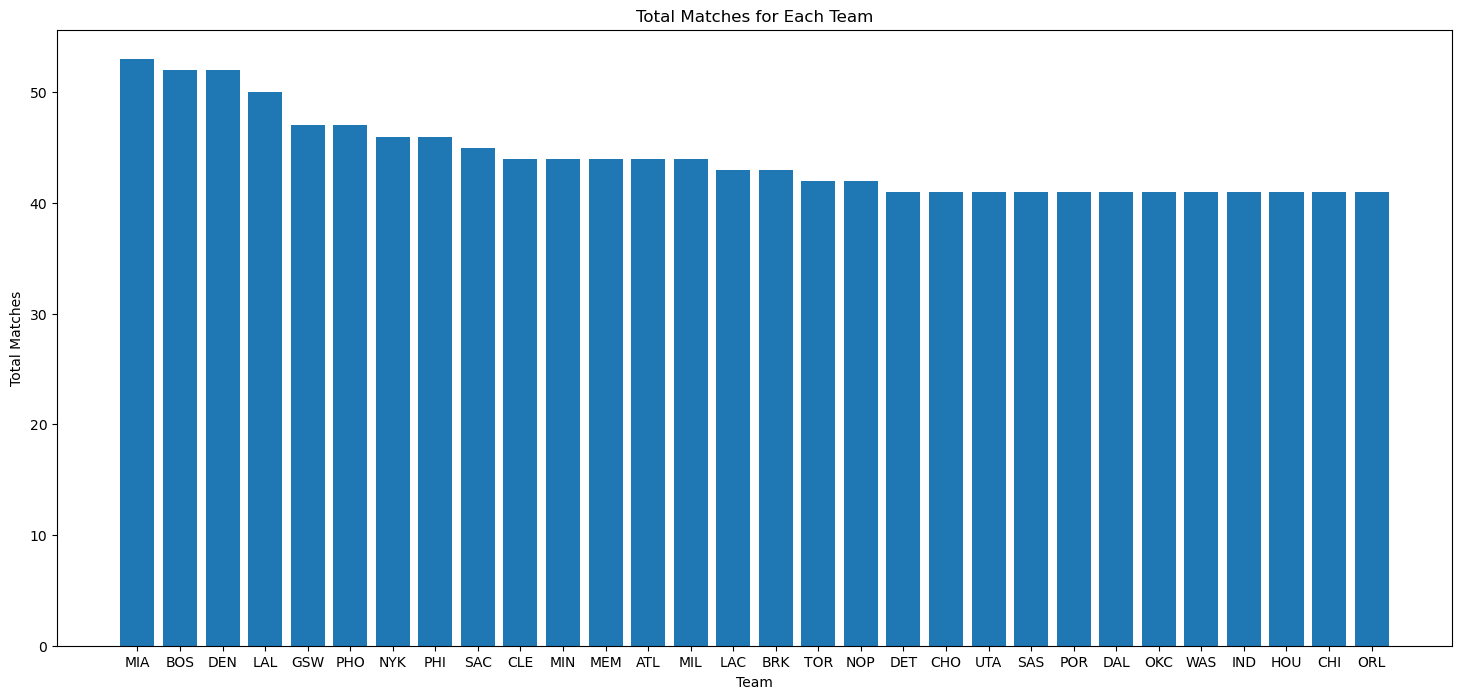

In [18]:
# Convert PySpark DataFrame to Pandas DataFrame
team_stats_pd = team_stats.toPandas()

# Visualization: Bar chart of total matches for each team
plt.figure(figsize=(18, 8))
plt.bar(team_stats_pd['team1'], team_stats_pd['total_matches'])
plt.title('Total Matches for Each Team')
plt.xlabel('Team')
plt.ylabel('Total Matches')
plt.show()



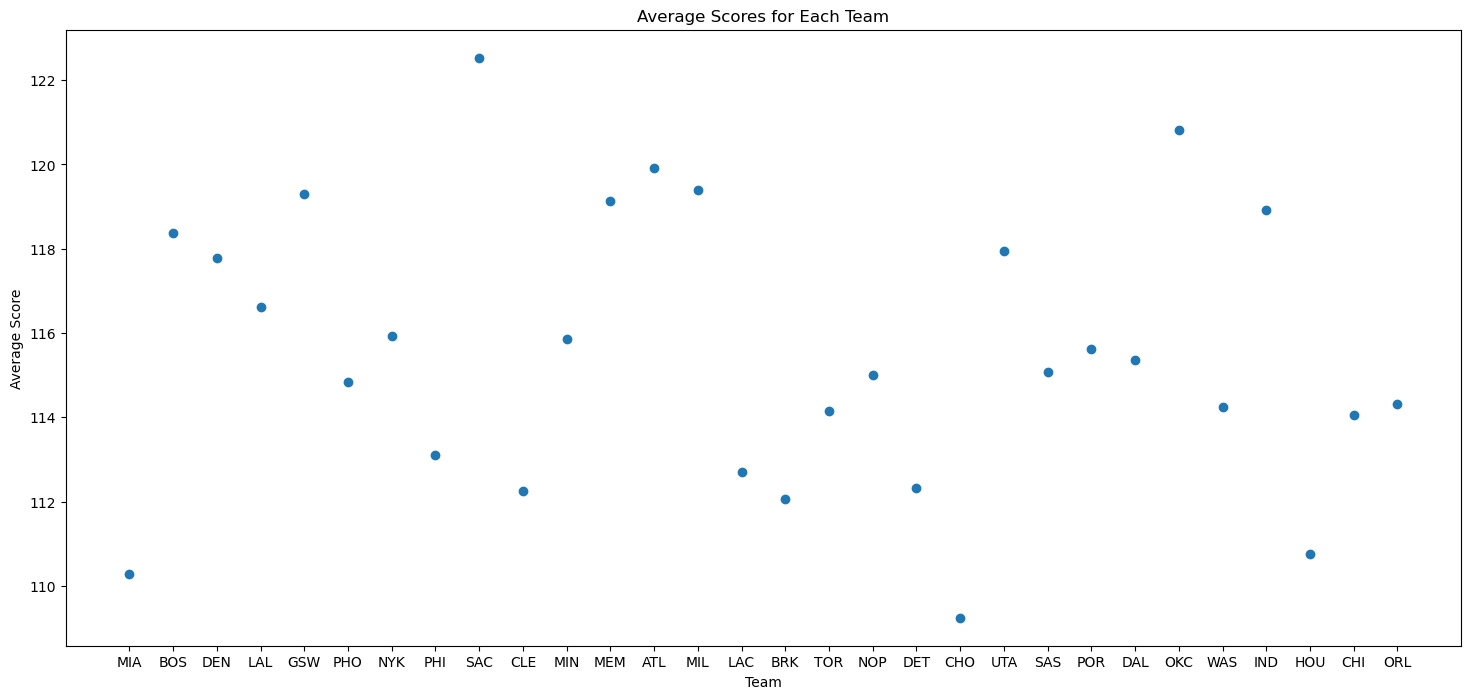

In [19]:
# Visualization: Scatter plot of average scores for each team
plt.figure(figsize=(18, 8))
plt.scatter(team_stats_pd['team1'], team_stats_pd['avg_score'])
plt.title('Average Scores for Each Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.show()

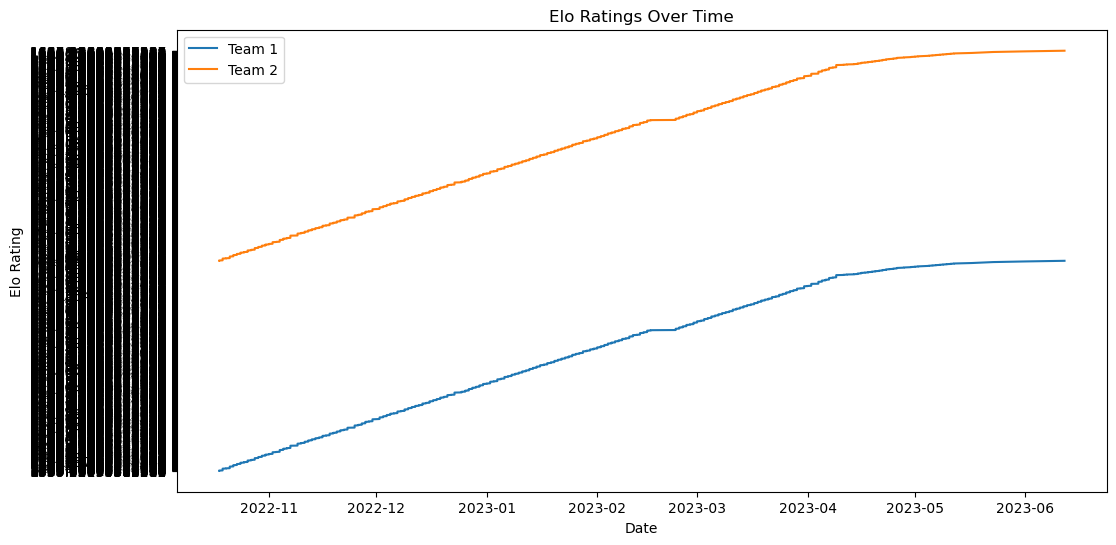

In [20]:
elo_ratings_over_time = (
    myData.select("date", "elo1_pre", "elo2_pre")
    .orderBy(col("date"))
    .toPandas()
)

# Visualization: Line plot of Elo ratings over time
plt.figure(figsize=(12, 6))
plt.plot(elo_ratings_over_time["date"], elo_ratings_over_time["elo1_pre"], label="Team 1")
plt.plot(elo_ratings_over_time["date"], elo_ratings_over_time["elo2_pre"], label="Team 2")
plt.title("Elo Ratings Over Time")
plt.xlabel("Date")
plt.ylabel("Elo Rating")
plt.legend()
plt.show()

## Linear Regression to make predictions

In [21]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

# Convert numeric columns to DoubleType
numeric_columns = ["elo1_pre", "elo2_pre", "score1", "score2"]

for col_name in numeric_columns:
    myData = myData.withColumn(col_name, col(col_name).cast(DoubleType()))

# Create a new column representing the score difference
myData = myData.withColumn("score_difference", col("score1") - col("score2"))

# Select relevant features and label column
selected_features = ["elo1_pre", "elo2_pre"]
label_column = "score_difference"

# Assemble features into a vector
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")

# Initialize Linear Regression model
linear_regression = LinearRegression(featuresCol="features", labelCol=label_column)

# Create a pipeline with the assembler and linear regression model
pipeline = Pipeline(stages=[assembler, linear_regression])

# Split the data into training and testing sets
(training_data, testing_data) = myData.randomSplit([0.8, 0.2], seed=42)

# Train the Linear Regression model
model = pipeline.fit(training_data)

# Make predictions on the testing data
predictions = model.transform(testing_data)

# Display predictions and actual score differences
predictions.select("features", label_column, "prediction").show()



+--------------------+----------------+-------------------+
|            features|score_difference|         prediction|
+--------------------+----------------+-------------------+
|[1535.40815239568...|            10.0|  7.850365932919821|
|[1605.02465402234...|             3.0|  5.815652984828468|
|[1542.31395090346...|             7.0|  7.698915650704176|
|[1551.76003357947...|            21.0| 3.7841283046021257|
|[1663.44948924052...|            -5.0|  8.054929337741651|
|[1544.64771395827...|            -6.0| 2.5440836049162368|
|[1529.13303231989...|             5.0|  7.288987261469323|
|[1398.33899260339...|            -2.0|-1.7933601132454822|
|[1592.20875460979...|            10.0|  5.640030126607019|
|[1592.3685824465,...|            -8.0|  4.626266085461888|
|[1542.2093172683,...|            -9.0|  4.415801604721983|
|[1553.47919346187...|            14.0|  7.471981671960723|
|[1568.84349975329...|             2.0|  1.947628995137169|
|[1457.17340343,13...|            15.0| 

In [22]:
from pyspark.ml.evaluation import RegressionEvaluator

# Define the evaluator
evaluator = RegressionEvaluator(
    labelCol=label_column,
    predictionCol="prediction",
    metricName="mse"  # You can use "rmse" or "mae" for different metrics
)

# Calculate the evaluation metric on the testing data
mse = evaluator.evaluate(predictions)

# Display the evaluation result
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE) on testing data: 169.35078991503985


In [23]:
# Evaluate the model using Root Mean Squared Error
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

print(f"Root Mean Square Error (RMSE): {rmse}")


Root Mean Square Error (RMSE): 13.013484925839037


In [24]:
# Evaluate the model using Mean Absolute Error
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})

print(f"MAE: {mae}")


MAE: 9.95391822205525


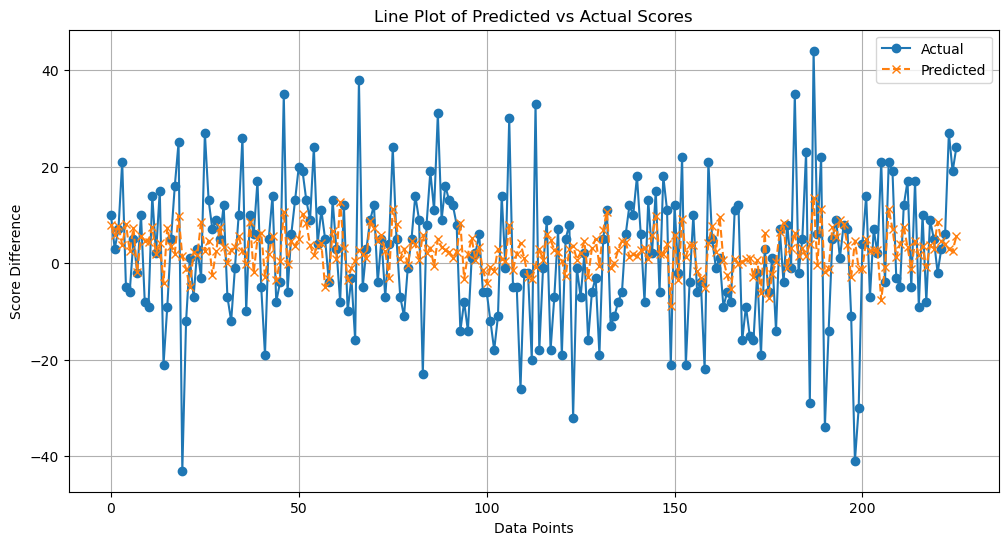

In [27]:
# Line plot of predicted vs actual
plt.figure(figsize=(12, 6))
plt.plot(predictions_pd["score_difference"], label="Actual", marker="o")
plt.plot(predictions_pd["prediction"], label="Predicted", linestyle="--", marker="x")
plt.title("Line Plot of Predicted vs Actual Scores")
plt.xlabel("Data Points")
plt.ylabel("Score Difference")
plt.legend()
plt.grid(True)
plt.show()

